In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv("../Resources/weather_classified_df.csv")
collision_df = pd.read_csv("../Resources/collision_2022_classified.csv")


<ipython-input-2-9bc6813838bb>:2: DtypeWarning: Columns (13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df = pd.read_csv("../Resources/collision_2022_classified.csv")


In [3]:
weather_df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip',
       'preciptype', 'snow', 'windspeed', 'visibility', 'severerisk',
       'sunrise', 'sunset', 'icon', 'temperature_category', 'precip_category',
       'humid_category', 'wind_level'],
      dtype='object')

In [4]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
collision_df['crash_datetime'] = pd.to_datetime(collision_df['crash_datetime'])

In [5]:
collision_df['date'] = collision_df['crash_datetime'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [6]:
collision_df['date'] = pd.to_datetime(collision_df['date'])

In [7]:
collision_df['hour'] = collision_df['crash_datetime'].dt.hour

In [8]:
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103782 entries, 0 to 103781
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_datetime                 103782 non-null  datetime64[ns]
 1   crash_day_of_week              103782 non-null  int64         
 2   crash_hour_category            103782 non-null  object        
 3   street_address                 103780 non-null  object        
 4   number_of_persons_injured      103782 non-null  int64         
 5   number_of_persons_killed       103782 non-null  int64         
 6   number_of_pedestrians_injured  103782 non-null  int64         
 7   number_of_pedestrians_killed   103782 non-null  int64         
 8   number_of_cyclist_injured      103782 non-null  int64         
 9   number_of_cyclist_killed       103782 non-null  int64         
 10  number_of_motorist_injured     103782 non-null  int64         
 11  

In [9]:
## create a new index so that we can include the everyday weather info for each zip code 
collision_df['zip_code'] = collision_df['zip_code'].astype(str)
collision_df["row_id"] = collision_df['zip_code'] + '_'+ collision_df["date"].astype(str)
collision_df1 = collision_df.set_index('row_id')
weather_df = weather_df.rename(columns={'datetime': 'date'})
weather_df.set_index("date",inplace = True)
allzipcodes_weather_df = pd.merge(collision_df1, weather_df, on='date', how='left').set_index(collision_df1.index)

In [10]:
allzipcodes_weather_df.columns

Index(['crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Population',
       'contributing_factor', 'number_of_injuries', 'number_of_deaths',
       'injuries_rate', 'death_rate', 'severity_of_accident', 'date', 'hour',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'sunrise', 'sunset',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level'],
      dtype='object')

In [11]:
allzipcodes_weather_df.to_csv('../Resources/allzipcodes_collision_weather_df.csv', index=True, header=True)

In [12]:
# select the top 10 zipcodes that have the largest number of accidents  
top10_zipcode = allzipcodes_weather_df['zip_code'].value_counts().sort_values(ascending = False).head(10)
top10_zipcode

zip_code
11236    2817
11207    2093
11222    1911
10472    1722
11203    1539
10468    1522
11385    1457
10314    1428
11355    1404
11435    1376
Name: count, dtype: int64

Explore the heatmap correlation between weather conditions and contributing factors among the top 10 regions that have the greatest number of accidents in 2022

In [13]:
weather_conditions = ['rain', 'cloudy', 'clear-day', 'snow']
precip_conditions= ['Dry', 'Light', 'Moderate', 'Heavy']
temp_conditions = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
humid_conditions = ['Low', 'High', 'Very High']
wind_conditions = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']

In [14]:
top_contributing_factors = allzipcodes_weather_df['contributing_factor'][~allzipcodes_weather_df['contributing_factor'].isin(["Unspecified", "Other Vehicular"])].value_counts(normalize=True).head(10).index
top_contributing_factors = top_contributing_factors.to_list()
top_contributing_factors

['Driver Inattention/Distraction',
 'Failure to Yield Right-of-Way',
 'Following Too Closely',
 'Passing or Lane Usage Improper',
 'Passing Too Closely',
 'Unsafe Speed',
 'Backing Unsafely',
 'Traffic Control Disregarded',
 'Turning Improperly',
 'Unsafe Lane Changing']

These collection of graphs presents a comprehensive view of weather conditions associated with accident data in top 10 areas with the largest number of traffic accidents in 2022. 

The precipitation graph indicates that dry conditions are most common during accidents, with a notable decrease in accident counts as precipitation increases. Temperature-related accidents are fairly distributed across 'Freezing Cold', 'Cold', and 'Moderate' categories, with fewer occurring in 'Warm' and 'Hot' conditions. High humidity seems to be the most prevalent condition in accidents, suggesting a possible impact on road safety. Wind levels mostly result in accidents when flags wave or leaves scatter, which are moderate wind conditions. Snow-related accidents are overwhelmingly more frequent when there is no snow, and visibility is predominantly high during most accidents, indicating that poor visibility is less commonly a contributing factor. The data suggests that most accidents occur under moderate weather conditions, with extreme weather being less commonly associated with traffic accidents.

In [15]:
## select all the rows related to zipcode = 10002
zipcode_weather_df = allzipcodes_weather_df[allzipcodes_weather_df["zip_code"].isin(top10_zipcode.index)]
zipcode_weather_df

,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,windspeed,visibility,severerisk,sunrise,sunset,icon,temperature_category,precip_category,humid_category,wind_level
row_id,,,,,,,,,,,,,,,,,,,,,
10314_2022-04-24,2022-04-24 16:45:00,6,Rush Hours,Staten Island Expressway,1,0,0,0,0,0,...,13.6,9.9,10.0,06:04,19:45,cloudy,Moderate,Dry,High,Leaves scatter
10472_2022-04-24,2022-04-24 09:51:00,6,Rush Hours,Cross Bronx Expy,0,0,0,0,0,0,...,13.6,9.9,10.0,06:04,19:45,cloudy,Moderate,Dry,High,Leaves scatter
11207_2022-03-08,2022-03-08 20:00:00,1,Other Hours,360 Snediker Avenue,0,0,0,0,0,0,...,10.1,9.9,10.0,06:18,17:55,rain,Moderate,Light,Low,Flags wave
11203_2022-04-12,2022-04-12 19:56:00,1,Rush Hours,Utica Avenue & Snyder Avenue,1,0,1,0,0,0,...,7.8,9.9,10.0,06:21,19:32,rain,Moderate,Light,High,Flags wave
11236_2022-04-24,2022-04-24 00:30:00,6,Late Night,Belt Parkway,1,0,0,0,0,0,...,13.6,9.9,10.0,06:04,19:45,cloudy,Moderate,Dry,High,Leaves scatter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10468_2022-12-14,2022-12-14 15:30:00,2,Rush Hours,Major Deegan Expressway,1,0,0,0,0,0,...,15.0,9.9,10.0,07:12,16:29,clear-day,Cold,Dry,High,Leaves scatter
10468_2022-04-07,2022-04-07 18:40:00,3,Rush Hours,Major Deegan Expressway,0,0,0,0,0,0,...,20.9,7.5,10.0,06:29,19:27,rain,Moderate,Moderate,Very High,Small trees sway
11203_2022-10-23,2022-10-23 06:00:00,6,Early Morning,700 Lefferts Avenue,0,0,0,0,0,0,...,13.9,9.9,10.0,07:16,18:04,rain,Moderate,Light,High,Leaves scatter


In [16]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'rain']
cloudy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'cloudy']
clear_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'clear-day']
snowy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['contributing_factor'][rainy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_cloudy= cloudy_days['contributing_factor'][cloudy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_clear= clear_days['contributing_factor'][clear_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True) 
ratio_snowy= snowy_days['contributing_factor'][snowy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True) 

weather_data = {}
# Create a DataFrame for the heatmap
for factor in top_contributing_factors: 
    weather_data[factor] = [ratio_rainy.get(factor, 0), ratio_cloudy.get(factor, 0), ratio_clear.get(factor, 0), ratio_snowy.get(factor, 0)]

heatmap_data_weather_cf = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])

In [17]:
# Filter data for different precipitation levels
dry_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Dry']
light_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Light']
moderate_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Moderate']
heavy_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Heavy']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_dry = dry_days['contributing_factor'][dry_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_light = light_days['contributing_factor'][light_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_moderate = moderate_days['contributing_factor'][moderate_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_heavy = heavy_days['contributing_factor'][heavy_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {}
for factor in top_contributing_factors:
    precip_data[factor] = [ratio_dry.get(factor, 0), ratio_light.get(factor, 0), ratio_moderate.get(factor, 0), ratio_heavy.get(factor, 0)]

heatmap_data_precip_cf = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data for different temperature levels
fc_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Freezing Cold']
cold_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Cold']
mod_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Moderate']
warm_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Warm']
hot_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Hot']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fc_temp = fc_days['contributing_factor'][fc_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_cold_temp = cold_days['contributing_factor'][cold_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_mod_temp = mod_days['contributing_factor'][mod_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_warm_temp = warm_days['contributing_factor'][warm_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_hot_temp = hot_days['contributing_factor'][hot_days['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {}
for factor in top_contributing_factors:
    temp_data[factor] = [ratio_fc_temp.get(factor, 0), ratio_cold_temp.get(factor, 0), ratio_mod_temp.get(factor, 0), ratio_warm_temp.get(factor, 0), ratio_hot_temp.get(factor, 0)]

heatmap_data_temp_cf = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])


# Filter data for different humidity levels
low_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Low']
high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'High']
very_high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Very High']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_low_humid = low_humid['contributing_factor'][low_humid['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_high_humid = high_humid['contributing_factor'][high_humid['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_very_high_humid = very_high_humid['contributing_factor'][very_high_humid['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
humid_data = {}
for factor in top_contributing_factors:
    humid_data[factor] = [ratio_low_humid.get(factor, 0), ratio_high_humid.get(factor, 0), ratio_very_high_humid.get(factor, 0)]

heatmap_data_humid_cf = pd.DataFrame(humid_data, index=['Low', 'High', 'Very High'])

# Filter data for different wind levels
flags_ripple = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags ripple']
flags_wave = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags wave']
leaves_scatter = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Leaves scatter']
small_trees_sway = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Small trees sway']
umbrellas_not_working = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_flags_ripple = flags_ripple['contributing_factor'][flags_ripple['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_flags_wave = flags_wave['contributing_factor'][flags_wave['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_leaves_scatter = leaves_scatter['contributing_factor'][leaves_scatter['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_small_trees_sway = small_trees_sway['contributing_factor'][small_trees_sway['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)
ratio_umbrellas_not_working = umbrellas_not_working['contributing_factor'][umbrellas_not_working['contributing_factor'].isin(top_contributing_factors)].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {}
for factor in top_contributing_factors:
    wind_data[factor] = [ratio_flags_ripple.get(factor, 0), ratio_flags_wave.get(factor, 0), ratio_leaves_scatter.get(factor, 0), ratio_small_trees_sway.get(factor, 0), ratio_umbrellas_not_working.get(factor, 0)]

heatmap_data_wind_cf = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


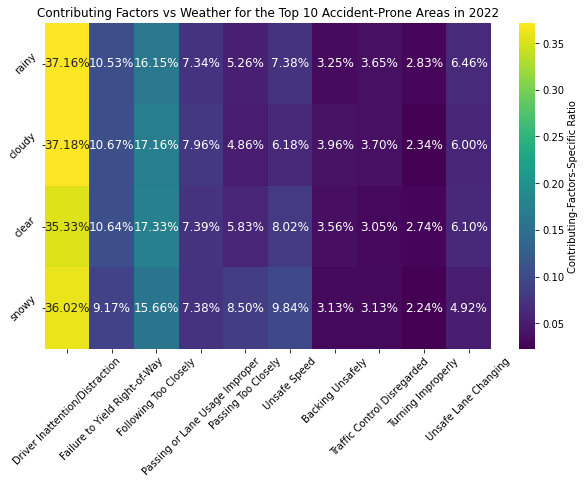

In [18]:
# Set up the first plot that shows the overall impact of weather on contributing factors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_weather_cf, annot = True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 12})
plt.title('Contributing Factors vs Weather for the Top 10 Accident-Prone Areas in 2022')
plt.tick_params(axis='y', rotation=45) 
plt.tick_params(axis='x', rotation=45) 
plt.show()

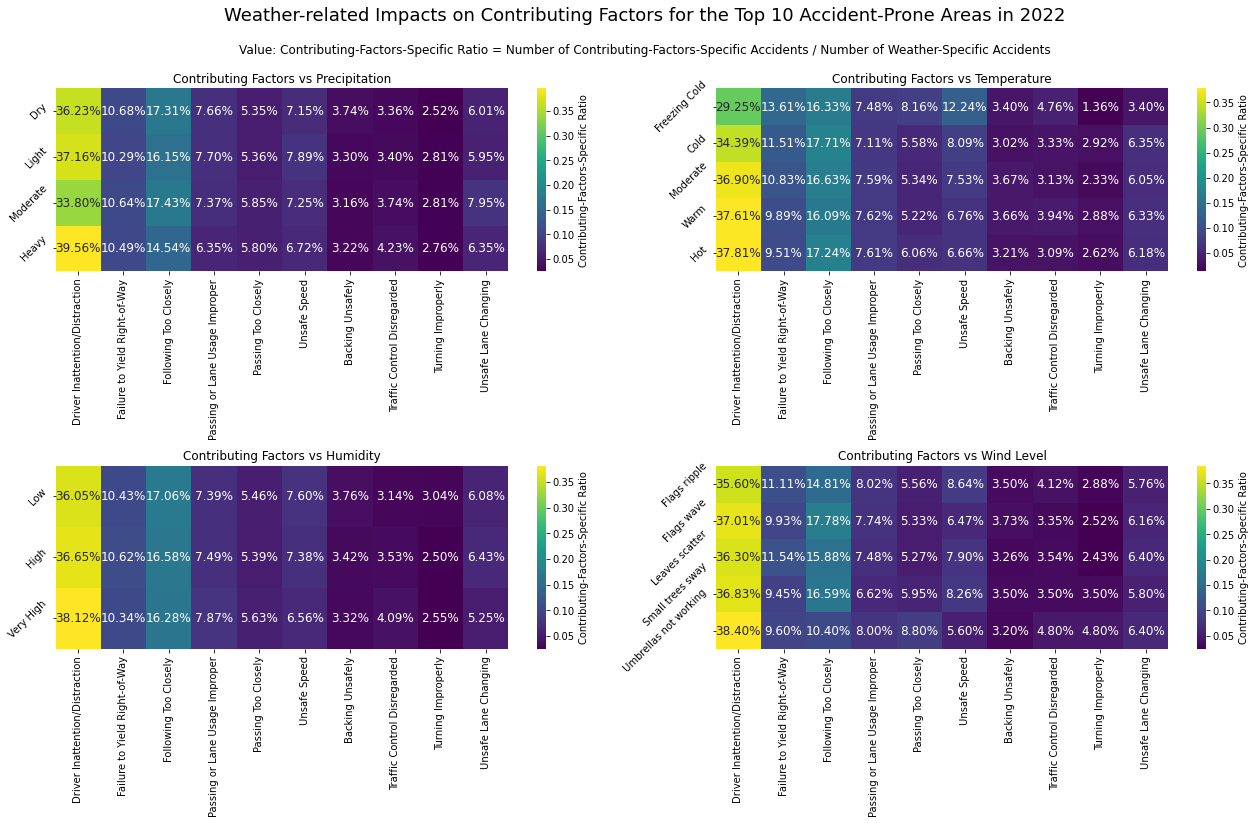

In [19]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Weather-related Impacts on Contributing Factors for the Top 10 Accident-Prone Areas in 2022', fontsize=18)
fig.text(0.5, 0.93, 'Value: Contributing-Factors-Specific Ratio = Number of Contributing-Factors-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=12)

sns.heatmap(heatmap_data_precip_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'},
            annot_kws={"size": 12}, ax = axes[0,0])
axes[0, 0].set_title('Contributing Factors vs Precipitation')
axes[0, 0].tick_params(axis='y', rotation=45) 

sns.heatmap(heatmap_data_temp_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12},ax = axes[0,1])
axes[0, 1].set_title('Contributing Factors vs Temperature')
axes[0, 1].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_humid_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,0])

axes[1, 0].set_title('Contributing Factors vs Humidity')
axes[1, 0].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_wind_cf, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Contributing-Factors-Specific Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,1])
axes[1, 1].set_title('Contributing Factors vs Wind Level')
axes[1, 1].tick_params(axis='y', rotation=45)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Create heatmap correlation plots between weather info and severity of accidents for the areas with top 10 most traffic accidents in 2022

In [20]:
# Filter data for rainy, non-rainy, and snowy days
rainy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'rain']
cloudy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'cloudy']
clear_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'clear-day']
snowy_days = zipcode_weather_df[zipcode_weather_df['icon'] == 'snow']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_rainy = rainy_days['severity_of_accident'].value_counts(normalize=True)
ratio_cloudy = cloudy_days['severity_of_accident'].value_counts(normalize=True)
ratio_clear = clear_days['severity_of_accident'].value_counts(normalize=True)
ratio_snowy = snowy_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
weather_data = {
    'Very Fatal': [ratio_rainy.get('Very Fatal', 0), ratio_cloudy.get('Very Fatal', 0), ratio_clear.get('Very Fatal', 0), ratio_snowy.get('Very Fatal', 0)],
    'Fatal': [ratio_rainy.get('Fatal', 0), ratio_cloudy.get('Fatal', 0), ratio_clear.get('Fatal', 0), ratio_snowy.get('Fatal', 0)],
    'Serious (High)': [ratio_rainy.get('Serious (High)', 0), ratio_cloudy.get('Serious (High)', 0), ratio_clear.get('Serious (High)', 0), ratio_snowy.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_rainy.get('Serious (Medium)', 0), ratio_cloudy.get('Serious (Medium)', 0), ratio_clear.get('Serious (Medium)', 0), ratio_snowy.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_rainy.get('Serious (Low)', 0), ratio_cloudy.get('Serious (Low)', 0), ratio_clear.get('Serious (Low)', 0), ratio_snowy.get('Serious (Low)', 0)],
    'Minor': [ratio_rainy.get('Minor', 0), ratio_cloudy.get('Minor', 0), ratio_clear.get('Minor', 0), ratio_snowy.get('Minor', 0)],
}

heatmap_data_weather = pd.DataFrame(weather_data, index=['rainy', 'cloudy', 'clear', 'snowy'])
heatmap_data_weather

,Very Fatal,Fatal,Serious (High),Serious (Medium),Serious (Low),Minor
rainy,0.000000,0.002562,0.004740,0.032667,0.356008,0.604023
cloudy,0.000000,0.002262,0.003620,0.033484,0.344570,0.616063
clear,0.000238,0.003804,0.005231,0.036852,0.344508,0.609368
snowy,0.001195,0.001195,0.001195,0.025090,0.284349,0.686977


In [21]:
# Filter data by precipitation level
dry_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Dry']
light_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Light']
moderate_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Moderate']
heavy_days = zipcode_weather_df[zipcode_weather_df['precip_category'] == 'Heavy']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_dry = dry_days['severity_of_accident'].value_counts(normalize=True)
ratio_light = light_days['severity_of_accident'].value_counts(normalize=True)
ratio_moderate = moderate_days['severity_of_accident'].value_counts(normalize=True)
ratio_heavy = heavy_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
precip_data = {
    'Very Fatal': [ratio_dry.get('Very Fatal', 0), ratio_light.get('Very Fatal', 0), ratio_moderate.get('Very Fatal', 0), ratio_heavy.get('Very Fatal', 0)],
    'Fatal': [ratio_dry.get('Fatal', 0), ratio_light.get('Fatal', 0), ratio_moderate.get('Fatal', 0), ratio_heavy.get('Fatal', 0)],
    'Serious (High)': [ratio_dry.get('Serious (High)', 0), ratio_light.get('Serious (High)', 0), ratio_moderate.get('Serious (High)', 0), ratio_heavy.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_dry.get('Serious (Medium)', 0), ratio_light.get('Serious (Medium)', 0), ratio_moderate.get('Serious (Medium)', 0), ratio_heavy.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_dry.get('Serious (Low)', 0), ratio_light.get('Serious (Low)', 0), ratio_moderate.get('Serious (Low)', 0), ratio_heavy.get('Serious (Low)', 0)],
    'Minor': [ratio_dry.get('Minor', 0), ratio_light.get('Minor', 0), ratio_moderate.get('Minor', 0), ratio_heavy.get('Minor', 0)],
}

heatmap_data_precip = pd.DataFrame(precip_data, index=['Dry', 'Light', 'Moderate', 'Heavy'])

# Filter data by temperature level
fc_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Freezing Cold']
cold_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Cold']
mod_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Moderate']
warm_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Warm']
hot_days = zipcode_weather_df[zipcode_weather_df['temperature_category'] == 'Hot']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fc = fc_days['severity_of_accident'].value_counts(normalize=True)
ratio_cold = cold_days['severity_of_accident'].value_counts(normalize=True)
ratio_mod = mod_days['severity_of_accident'].value_counts(normalize=True)
ratio_warm = warm_days['severity_of_accident'].value_counts(normalize=True)
ratio_hot = hot_days['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
temp_data = {
    'Very Fatal': [ratio_fc.get('Very Fatal', 0), ratio_cold.get('Very Fatal', 0), ratio_mod.get('Very Fatal', 0), ratio_warm.get('Very Fatal', 0), ratio_hot.get('Very Fatal', 0)],
    'Fatal': [ratio_fc.get('Fatal', 0), ratio_cold.get('Fatal', 0), ratio_mod.get('Fatal', 0), ratio_warm.get('Fatal', 0), ratio_hot.get('Fatal', 0)],
    'Serious (High)': [ratio_fc.get('Serious (High)', 0), ratio_cold.get('Serious (High)', 0), ratio_mod.get('Serious (High)', 0), ratio_warm.get('Serious (High)', 0), ratio_hot.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_fc.get('Serious (Medium)', 0), ratio_cold.get('Serious (Medium)', 0), ratio_mod.get('Serious (Medium)', 0), ratio_warm.get('Serious (Medium)', 0), ratio_hot.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_fc.get('Serious (Low)', 0), ratio_cold.get('Serious (Low)', 0), ratio_mod.get('Serious (Low)', 0), ratio_warm.get('Serious (Low)', 0), ratio_hot.get('Serious (Low)', 0)],
    'Minor': [ratio_fc.get('Minor', 0), ratio_cold.get('Minor', 0), ratio_mod.get('Minor', 0), ratio_warm.get('Minor', 0), ratio_hot.get('Minor', 0)],
}

heatmap_data_temp = pd.DataFrame(temp_data, index=['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot'])

# Filter data by humidity level
low_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Low']
high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'High']
very_high_humid = zipcode_weather_df[zipcode_weather_df['humid_category'] == 'Very High']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_low = low_humid['severity_of_accident'].value_counts(normalize=True)
ratio_high = high_humid['severity_of_accident'].value_counts(normalize=True)
ratio_veryhigh = very_high_humid['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
humid_data = {
    'Very Fatal': [ratio_low.get('Very Fatal', 0), ratio_high.get('Very Fatal', 0), ratio_veryhigh.get('Very Fatal', 0)],
    'Fatal': [ratio_low.get('Fatal', 0), ratio_high.get('Fatal', 0), ratio_veryhigh.get('Fatal', 0)],
    'Serious (High)': [ratio_low.get('Serious (High)', 0), ratio_high.get('Serious (High)', 0), ratio_veryhigh.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_low.get('Serious (Medium)', 0), ratio_high.get('Serious (Medium)', 0), ratio_veryhigh.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_low.get('Serious (Low)', 0), ratio_high.get('Serious (Low)', 0), ratio_veryhigh.get('Serious (Low)', 0)],
    'Minor': [ratio_low.get('Minor', 0), ratio_high.get('Minor', 0), ratio_veryhigh.get('Minor', 0)],
}

heatmap_data_humid = pd.DataFrame(humid_data, index=['Low', 'High', 'Very High'])

# Filter data by wind level
flags_ripple = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags ripple']
flags_wave = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Flags wave']
leaves_scatter = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Leaves scatter']
small_trees_sway = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Small trees sway']
umbrellas_not_working = zipcode_weather_df[zipcode_weather_df['wind_level'] == 'Umbrellas not working']

# Calculate the ratio of each severity level to total accidents for each condition
ratio_fr = flags_ripple['severity_of_accident'].value_counts(normalize=True)
ratio_fw = flags_wave['severity_of_accident'].value_counts(normalize=True)
ratio_ls = leaves_scatter['severity_of_accident'].value_counts(normalize=True)
ratio_sts = small_trees_sway['severity_of_accident'].value_counts(normalize=True)
ratio_unw = umbrellas_not_working['severity_of_accident'].value_counts(normalize=True)

# Create a DataFrame for the heatmap
wind_data = {
    'Very Fatal': [ratio_fr.get('Very Fatal', 0), ratio_fw.get('Very Fatal', 0), ratio_ls.get('Very Fatal', 0), ratio_sts.get('Very Fatal', 0), ratio_unw.get('Very Fatal', 0)],
    'Fatal': [ratio_fr.get('Fatal', 0), ratio_fw.get('Fatal', 0), ratio_ls.get('Fatal', 0), ratio_sts.get('Fatal', 0), ratio_unw.get('Fatal', 0)],
    'Serious (High)': [ratio_fr.get('Serious (High)', 0), ratio_fw.get('Serious (High)', 0), ratio_ls.get('Serious (High)', 0), ratio_sts.get('Serious (High)', 0), ratio_unw.get('Serious (High)', 0)],
    'Serious (Medium)': [ratio_fr.get('Serious (Medium)', 0), ratio_fw.get('Serious (Medium)', 0), ratio_ls.get('Serious (Medium)', 0), ratio_sts.get('Serious (Medium)', 0), ratio_unw.get('Serious (Medium)', 0)],
    'Serious (Low)': [ratio_fr.get('Serious (Low)', 0), ratio_fw.get('Serious (Low)', 0), ratio_ls.get('Serious (Low)', 0), ratio_sts.get('Serious (Low)', 0), ratio_unw.get('Serious (Low)', 0)],
    'Minor': [ratio_fr.get('Minor', 0), ratio_fw.get('Minor', 0), ratio_ls.get('Minor', 0), ratio_sts.get('Minor', 0), ratio_unw.get('Minor', 0)],
}

heatmap_data_wind = pd.DataFrame(wind_data, index=['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working'])


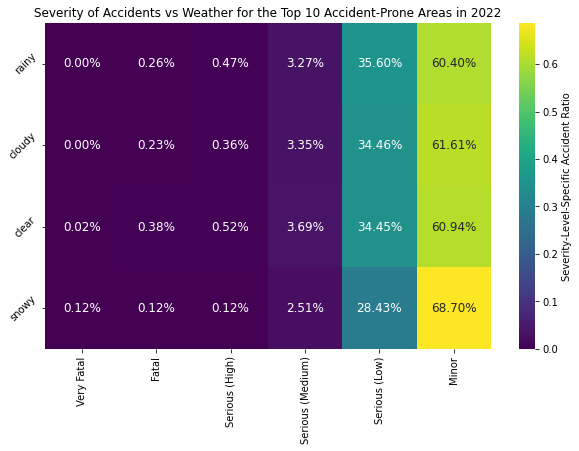

In [22]:
# Set up the first plot that shows the overall impact of weather on severity of accidents
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_weather, annot = True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'},
            annot_kws={"size": 12})
plt.title('Severity of Accidents vs Weather for the Top 10 Accident-Prone Areas in 2022')
plt.tick_params(axis='y', rotation=45) 
plt.show()

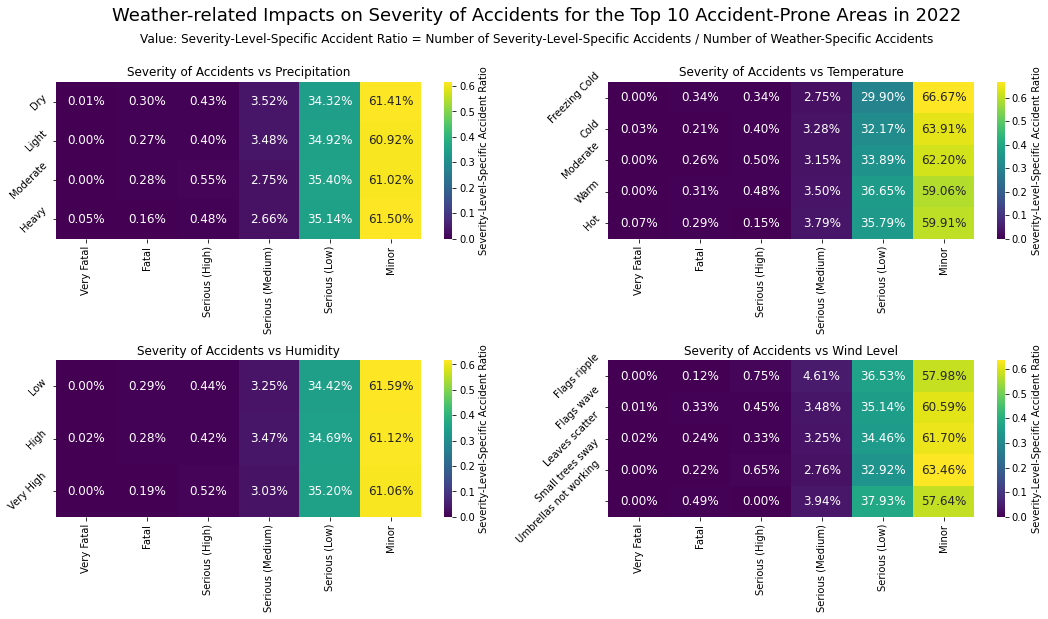

In [23]:
# Set up the plot for other weater details
# Set up the grid layout
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle('Weather-related Impacts on Severity of Accidents for the Top 10 Accident-Prone Areas in 2022', fontsize=18)
fig.text(0.5, 0.93, 'Value: Severity-Level-Specific Accident Ratio = Number of Severity-Level-Specific Accidents / Number of Weather-Specific Accidents',
         ha='center', va='center', fontsize=12)

sns.heatmap(heatmap_data_precip, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'},
            annot_kws={"size": 12}, ax = axes[0,0])
axes[0, 0].set_title('Severity of Accidents vs Precipitation')
axes[0, 0].tick_params(axis='y', rotation=45) 

sns.heatmap(heatmap_data_temp, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12},ax = axes[0,1])
axes[0, 1].set_title('Severity of Accidents vs Temperature')
axes[0, 1].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_humid, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,0])

axes[1, 0].set_title('Severity of Accidents vs Humidity')
axes[1, 0].tick_params(axis='y', rotation=45)  

sns.heatmap(heatmap_data_wind, annot=True, fmt='.2%', cmap='viridis', cbar_kws={'label': 'Severity-Level-Specific Accident Ratio'}, 
            annot_kws={"size": 12}, ax = axes[1,1])
axes[1, 1].set_title('Severity of Accidents vs Wind Level')
axes[1, 1].tick_params(axis='y', rotation=45)  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Weather-Related Distributions of Traffic Accidents for the Top 10 Accident-Prone Areas in 2022

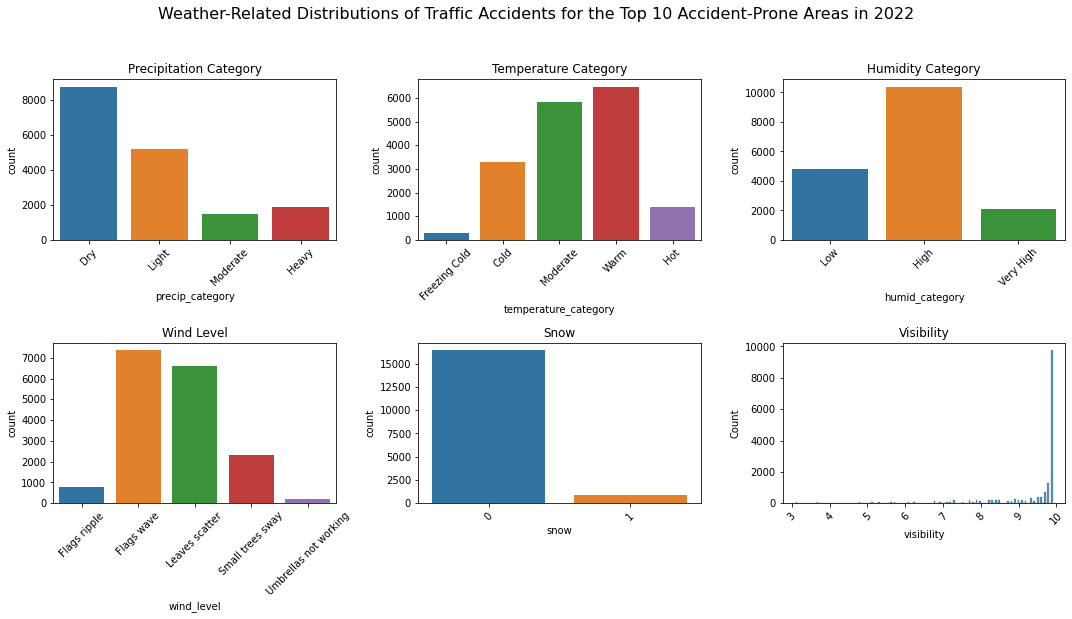

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the top 10 accident-prone ZIP code 
top10_zip_df = allzipcodes_weather_df[allzipcodes_weather_df['zip_code'].isin(top10_zipcode.index)]

# Set up the grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle('Weather-Related Distributions of Traffic Accidents for the Top 10 Accident-Prone Areas in 2022', fontsize=16)

# Plot distribution of Precipitation Category
precip_order = ['Dry', 'Light', 'Moderate', 'Heavy']
sns.countplot(x='precip_category', data=top10_zip_df, order=precip_order, ax=axes[0, 0])
axes[0, 0].set_title('Precipitation Category')
axes[0, 0].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Temperature Category
temp_order = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
sns.countplot(x='temperature_category', data=top10_zip_df, order=temp_order, ax=axes[0, 1])
axes[0, 1].set_title('Temperature Category')
axes[0, 1].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Humidity Category
humid_order = ['Low', 'High', 'Very High']
sns.countplot(x='humid_category', data=top10_zip_df, order=humid_order, ax=axes[0, 2])
axes[0, 2].set_title('Humidity Category')
axes[0, 2].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Wind Level
wind_order = ['Flags ripple', 'Flags wave', 'Leaves scatter', 'Small trees sway', 'Umbrellas not working']
sns.countplot(x='wind_level', data=top10_zip_df, order=wind_order, ax=axes[1, 0])
axes[1, 0].set_title('Wind Level')
axes[1, 0].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Snow
sns.countplot(x='snow', data=top10_zip_df, ax=axes[1, 1])
axes[1, 1].set_title('Snow')
axes[1, 1].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Plot distribution of Visibility
sns.histplot(x='visibility', data=top10_zip_df, ax=axes[1, 2])
axes[1, 2].set_title('Visibility')
axes[1, 2].tick_params(axis='x', rotation=45)  # Set x-axis label orientation

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


Create plots that show the impact of weather on the overall counts of accidents 

In [25]:
# create a collision_count_df that counts the total number of accidents by date
# merge the weather info to the collision_count_df
columns_to_drop = ["latitude", "longitude", "death_rate","injuries_rate", "hour","Population","crash_day_of_week"]
collision_count_df = collision_df.groupby('date').sum(numeric_only=True).drop(columns_to_drop, axis = 1)
collision_count_df["count"] = collision_df.groupby('date').size()

merged_df = pd.merge(collision_count_df, weather_df, left_index = True,right_index=True)
merged_df

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_injuries,number_of_deaths,...,windspeed,visibility,severerisk,sunrise,sunset,icon,temperature_category,precip_category,humid_category,wind_level
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,140,0,24,0,10,0,104,0,278,0,...,8.1,5.4,0.0,07:20,16:39,rain,Moderate,Heavy,Very High,Flags wave
2022-01-02,77,2,12,1,8,0,53,1,150,4,...,14.2,7.3,0.0,07:20,16:40,rain,Moderate,Light,Very High,Leaves scatter
2022-01-03,80,0,15,0,5,0,59,0,159,0,...,16.2,9.9,0.0,07:20,16:41,cloudy,Cold,Dry,Low,Leaves scatter
2022-01-04,113,2,27,1,2,0,83,1,225,4,...,12.4,9.9,0.0,07:20,16:42,clear-day,Cold,Dry,Low,Leaves scatter
2022-01-05,152,0,25,0,6,0,118,0,301,0,...,12.8,8.4,0.0,07:20,16:42,rain,Cold,Moderate,High,Leaves scatter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,89,0,22,0,3,0,61,0,175,0,...,10.4,9.9,10.0,07:19,16:35,cloudy,Cold,Dry,Low,Flags wave
2022-12-28,118,4,16,1,10,1,88,2,232,8,...,11.4,9.9,10.0,07:19,16:36,cloudy,Moderate,Dry,Low,Flags wave
2022-12-29,129,3,24,1,7,0,92,2,252,6,...,9.4,9.9,10.0,07:19,16:36,clear-day,Moderate,Dry,Low,Flags wave


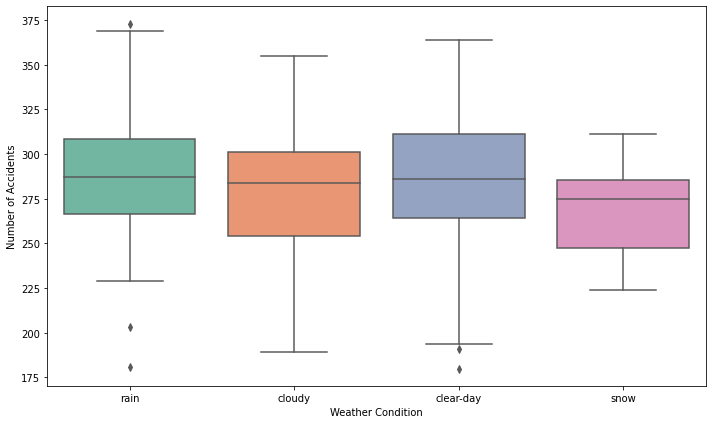

<Figure size 432x288 with 0 Axes>

In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='icon', y='count', data=merged_df, palette='Set2')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.savefig('../static/images/accident_count_by_weather.png', dpi=300, bbox_inches='tight')
plt.show()

The boxplots illustrate the distribution of accident numbers under different weather conditions. Rain and cloudy weather show a wide range of accident counts, with rain exhibiting some outliers, indicating occasional spikes in accident numbers during such weather. Clear days have a relatively compact distribution but with a slight skew towards higher accident counts. Snowy conditions, while having fewer accidents overall, display a tight distribution with fewer outliers, suggesting a more consistent accident rate during such conditions. Overall, the variability in accident counts is greatest during rainy and cloudy weather, which could be due to the impact of these conditions on visibility and road surface conditions, affecting driving safety.

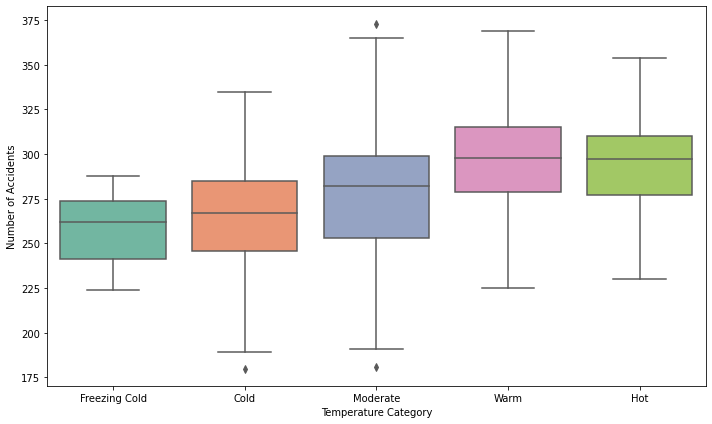

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

temp_order = ['Freezing Cold', 'Cold', 'Moderate', 'Warm', 'Hot']

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='temperature_category', y='count', order = temp_order, data=merged_df, palette='Set2')

# Set plot labels and title
plt.xlabel('Temperature Category')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.savefig('../static/images/temperature_boxplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


The boxplots visualize the distribution of crashes across different temperature levels. Moderate temperatures seem to have a higher median number of crashes compared to other categories, with a notable spread of data points indicating variability in crash frequency. Cold temperatures show a similar range of crash numbers, with outliers suggesting occasional spikes in crashes during colder weather. Freezing temperatures have the smallest interquartile range, indicating more consistent crash numbers, while warm and hot temperatures show a wider spread, with warm temperatures having a slightly higher median number of crashes. This information could suggest that driver behavior or road conditions at moderate to warm temperatures might contribute to higher crash frequencies.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


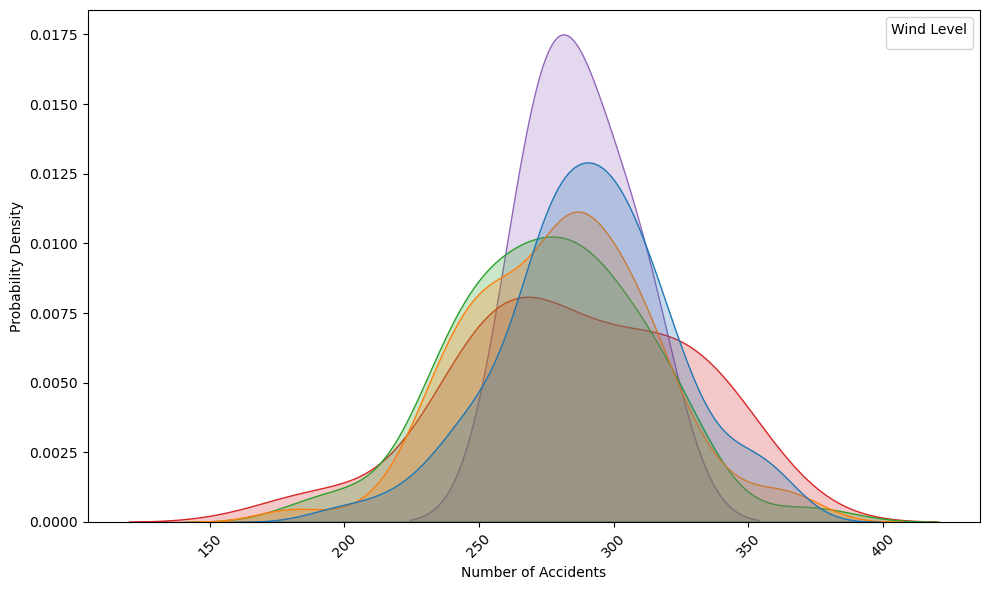

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution using a kernel density estimate (KDE) for each wind level
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='count', hue='wind_level', common_norm=False, fill=True)

# Set plot labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Probability Density')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title='Wind Level', loc='upper right')

plt.tight_layout()
plt.savefig('../static/images/accident_distribution_by_wind_level.png', dpi=300)

# Show the plot
plt.show()



The graph depicts the probability distribution of accidents for different wind levels throughout 2022. Each bell-shaped curve represents the likelihood of accident counts at varying wind intensities. The overlapping nature of the distributions suggests that there is no clear, singular effect of wind on the probability of accidents, as the ranges of accident numbers for different wind levels are quite similar. The peak of each distribution indicates the most probable number of accidents at a particular wind level, and the width of the curves reflects the variability of accidents associated with that wind level. Notably, no single wind level stands out as having a significantly different impact on the number of accidents, implying that wind may not be a decisive factor in the frequency of accidents.